In [2]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

import electrode2currentmap
reload(electrode2currentmap)

<module 'electrode2currentmap' from '/Users/arokem/source/pulse2percept/python/electrode2currentmap.py'>

In [3]:
electrode_radius = 200 
sizex = 5000
sizey = 5000
sampling=25
alpha=14000
n=1.69


x = -100 

y = -200
[gridx, gridy] = np.meshgrid(np.arange(-sizex//2, sizex//2, sampling),
                     np.arange(-sizey//2, sizey//2, sampling))


r = np.sqrt((gridx + x) ** 2 + (gridy + y) ** 2)
cspread = np.ones(r.shape)
cspread[r > electrode_radius] = alpha / (alpha + (r[r > electrode_radius] - electrode_radius) ** n)

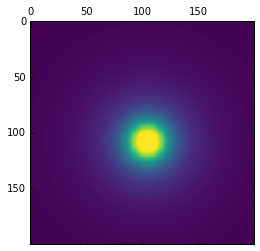

In [4]:
plt.figure()
plt.matshow(cspread, cmap='viridis')

#plt.figure()
#plt.plot(cspread[sizex//2])

In [5]:
e1 = electrode2currentmap.Electrode(200, 0, 0, 5000, 5000)
e2 = electrode2currentmap.Electrode(200, -1000, 1000, 5000, 5000)

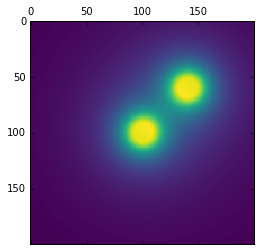

In [6]:
plt.matshow(e1.scale + e2.scale, cmap='viridis')

In [ ]:
electrode2currentmap.ElectrodeGrid()

In [16]:
my_grid = electrode2currentmap.ElectrodeGrid([100, 200], [0, -1000], [0, 1000], 5000, 5000)

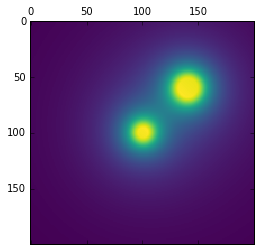

In [17]:
plt.matshow(np.mean(my_grid.scale, 0), cmap='viridis')

In [23]:
my_grid.electrodes[0].scale.ravel()[np.argmax(my_grid.electrodes[0].scale)]

1.0

In [26]:
1/(0.01/1000.)


99999.99999999999